<a href="https://colab.research.google.com/github/yugpatelyp2/uk_traffic_and_accidents/blob/main/uk_traffic_accidents_V1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data and cleaning

In [3]:
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
#casualties=pd.read_csv('Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
#vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
#region_traffic=pd.read_csv('region_traffic.csv', error_bad_lines=False,warn_bad_lines=False)

In [7]:
accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
casualties=pd.read_csv('Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
region_traffic=pd.read_csv('region_traffic.csv', error_bad_lines=False,warn_bad_lines=False)

In [8]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


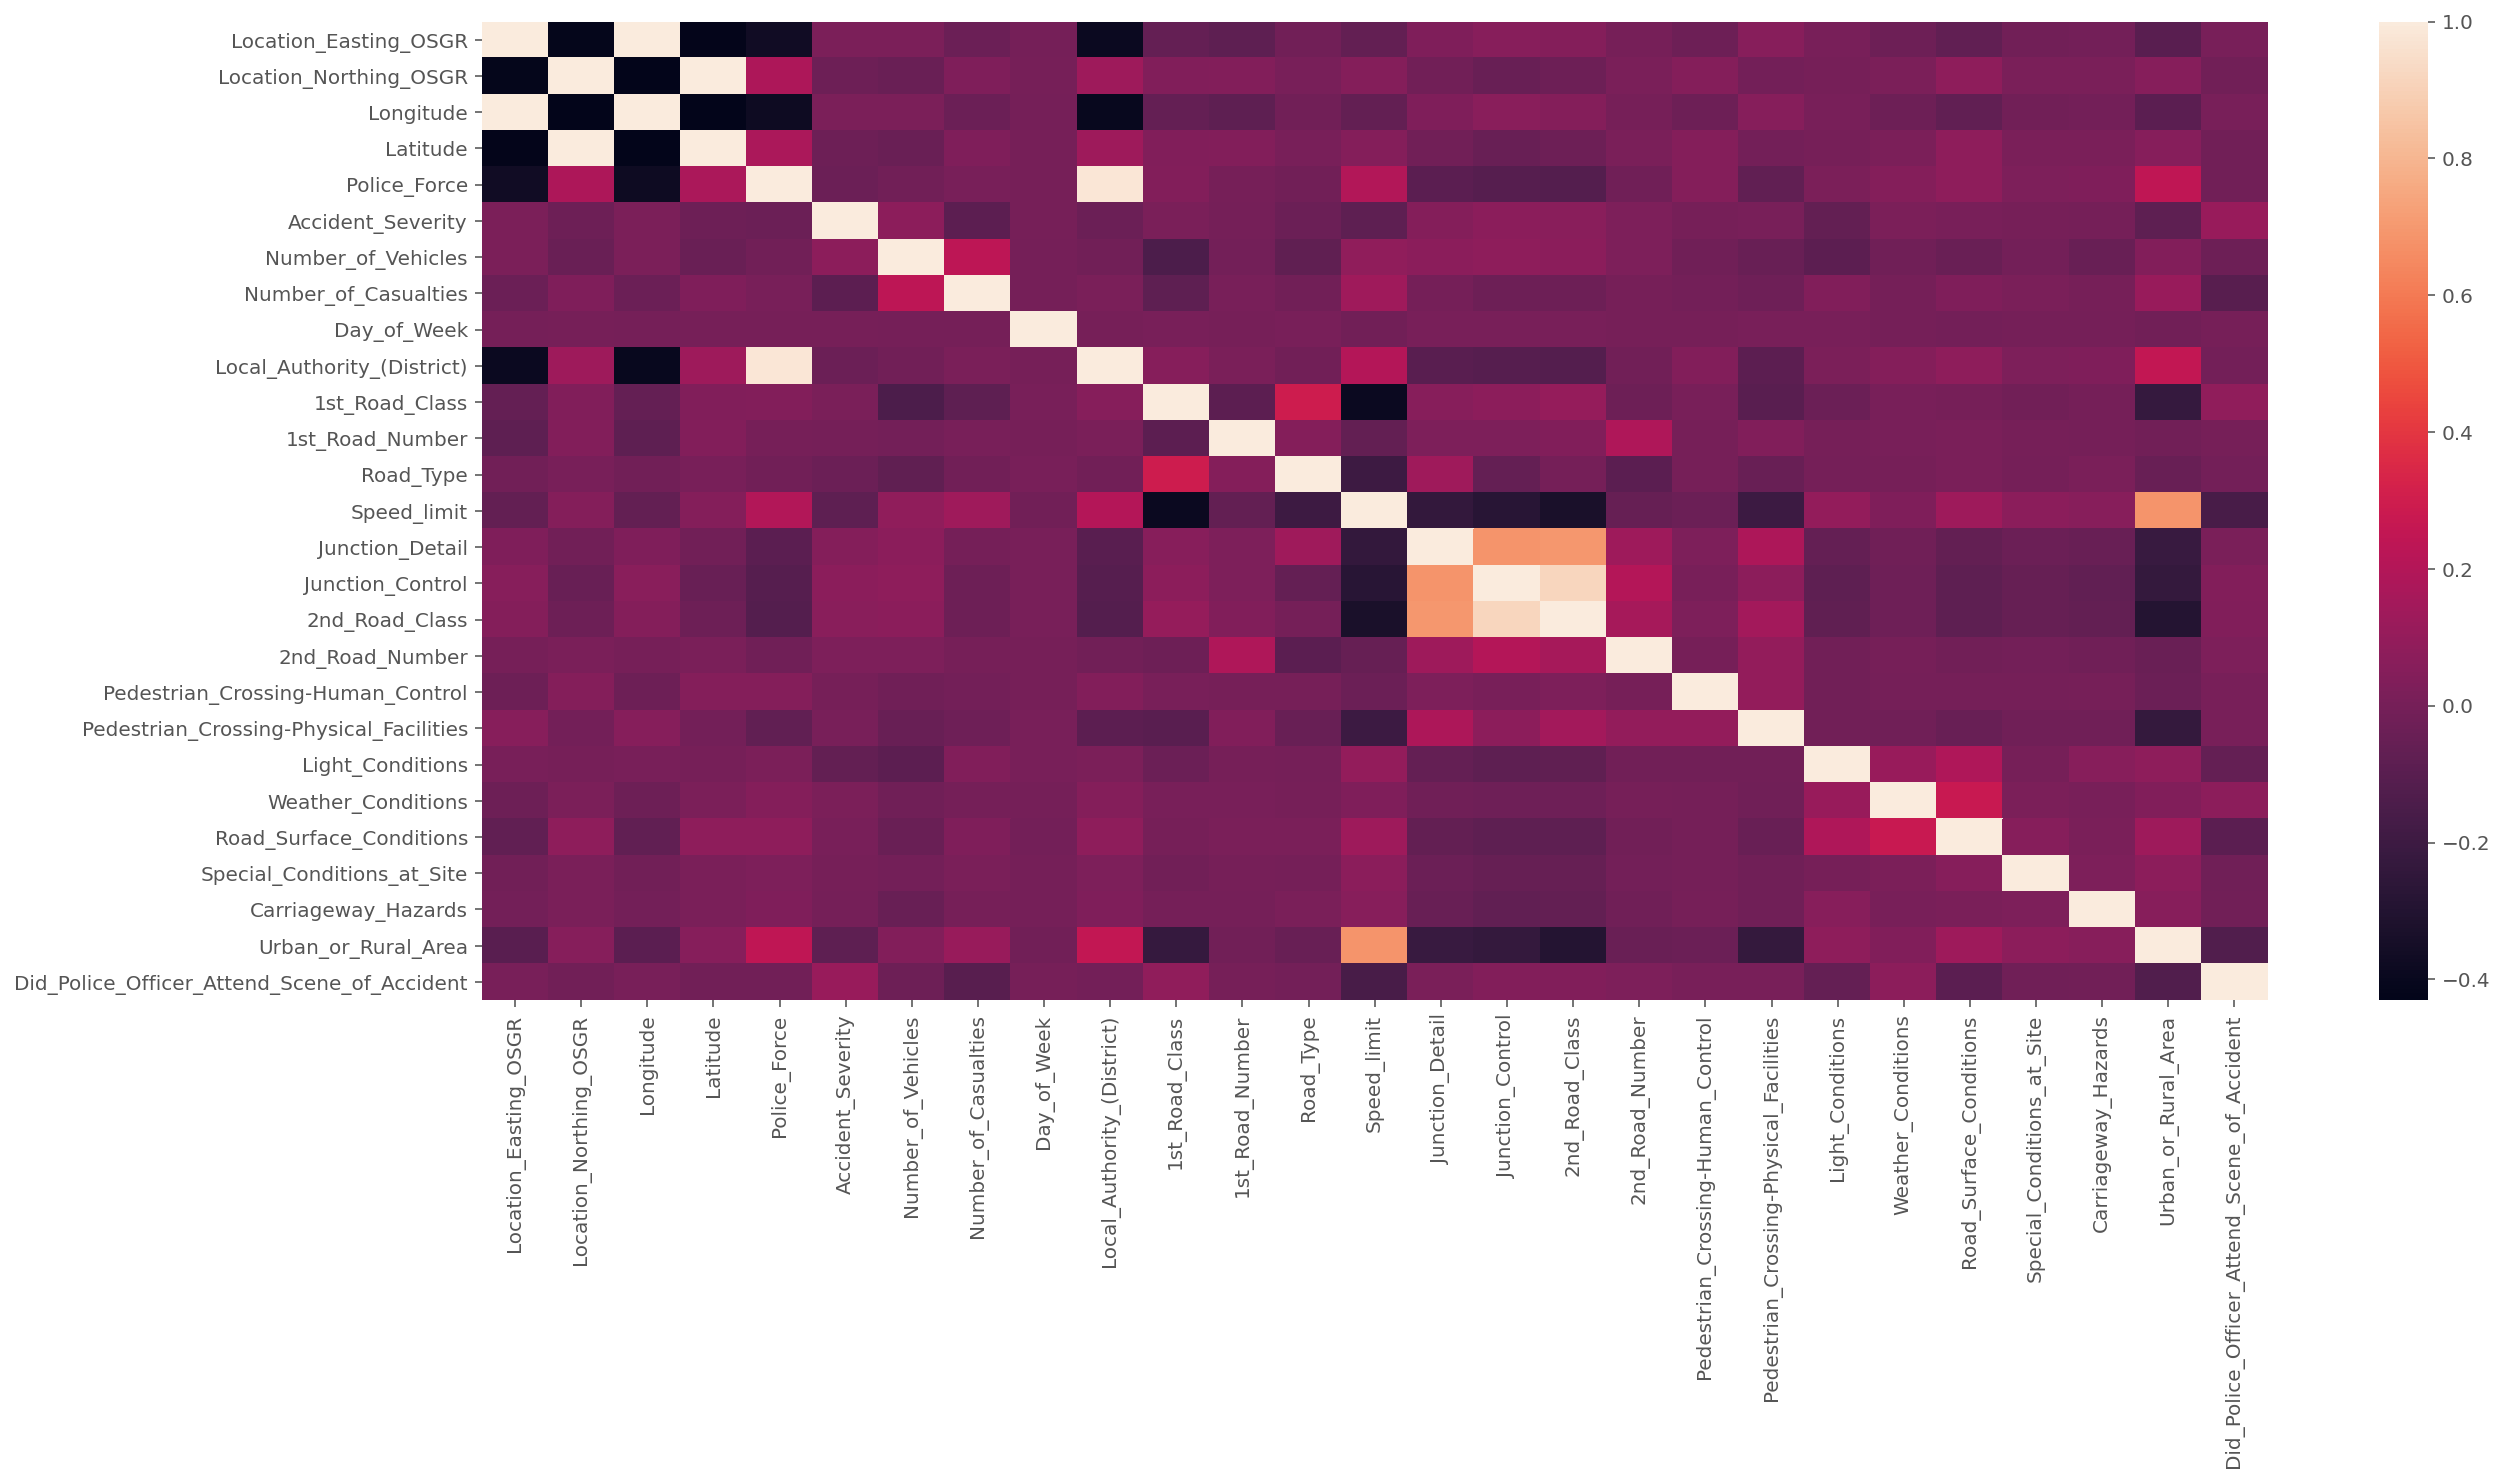

In [9]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [10]:
region_traffic.head()

,year,region_id,region_name,road_category_id,road_category_name,road_category_description,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,2019,1,South West,4,PA,Class A Principal road,4253.7,2643.13,5.435658e+07,1.061510e+08,8.525295e+09,6.718390e+07,1.601047e+09,3.836536e+08,1.068333e+10
1,2019,5,North West,4,PA,Class A Principal road,3793.0,2356.86,6.273163e+07,7.224395e+07,9.158519e+09,9.010205e+07,1.452720e+09,3.944172e+08,1.116800e+10
2,2019,3,Scotland,3,TA,Class A Trunk road,2952.5,1834.60,4.618189e+06,5.055147e+07,5.002907e+09,5.497848e+07,1.090808e+09,5.340358e+08,6.733280e+09
3,2019,10,West Midlands,2,PM,M or Class A Principal Motorway,3.8,2.36,0.000000e+00,2.447062e+05,6.610085e+07,5.540045e+05,9.836292e+06,3.804494e+06,8.054034e+07
4,2019,6,London,3,TA,Class A Trunk road,1.6,0.99,1.722875e+04,1.087472e+05,9.981850e+06,5.335774e+04,1.933932e+06,1.051267e+06,1.312915e+07


In [11]:
region_traffic.shape

(1645, 15)

In [12]:
print('road_category_description')
region_traffic['road_category_description'].value_counts()

road_category_description


Class A Principal road             297
Class C and Unclassified road      297
Class B road                       297
M or Class A Trunk Motorway        297
Class A Trunk road                 284
M or Class A Principal Motorway    173
Name: road_category_description, dtype: int64

In [13]:
print('region_name')
region_traffic['region_name'].value_counts()

region_name


Yorkshire and The Humber    162
West Midlands               162
North East                  162
South East                  162
North West                  162
South West                  143
Wales                       141
Scotland                    141
East Midlands               141
East of England             141
London                      128
Name: region_name, dtype: int64

In [14]:
print('region_id')
region_traffic['region_id'].value_counts()

region_id


11    162
10    162
9     162
8     162
5     162
1     143
7     141
4     141
3     141
2     141
6     128
Name: region_id, dtype: int64

In [15]:
#Total vehicle miles (billions)
region_traffic.groupby('region_name')['all_hgvs'].sum()/1000000000

region_name
East Midlands               51.372144
East of England             54.688936
London                      17.527338
North East                  12.994773
North West                  54.603954
Scotland                    41.791914
South East                  64.995477
South West                  38.871491
Wales                       20.355423
West Midlands               50.973384
Yorkshire and The Humber    48.272793
Name: all_hgvs, dtype: float64

In [16]:
region_traffic.groupby('region_name')['all_motor_vehicles'].sum()/1000000000

region_name
East Midlands                676.625952
East of England              918.158533
London                       536.848995
North East                   314.583216
North West                   922.975804
Scotland                     707.429347
South East                  1402.851963
South West                   805.598090
Wales                        451.146210
West Midlands                803.665867
Yorkshire and The Humber     694.995567
Name: all_motor_vehicles, dtype: float64

In [17]:
region_traffic.groupby('road_category_description')['all_motor_vehicles'].sum()/1000000000

road_category_description
Class A Principal road             2509.799109
Class A Trunk road                 1160.075220
Class B road                        638.369084
Class C and Unclassified road      2335.849341
M or Class A Principal Motorway      16.262496
M or Class A Trunk Motorway        1574.524294
Name: all_motor_vehicles, dtype: float64

No handles with labels found to put in legend.


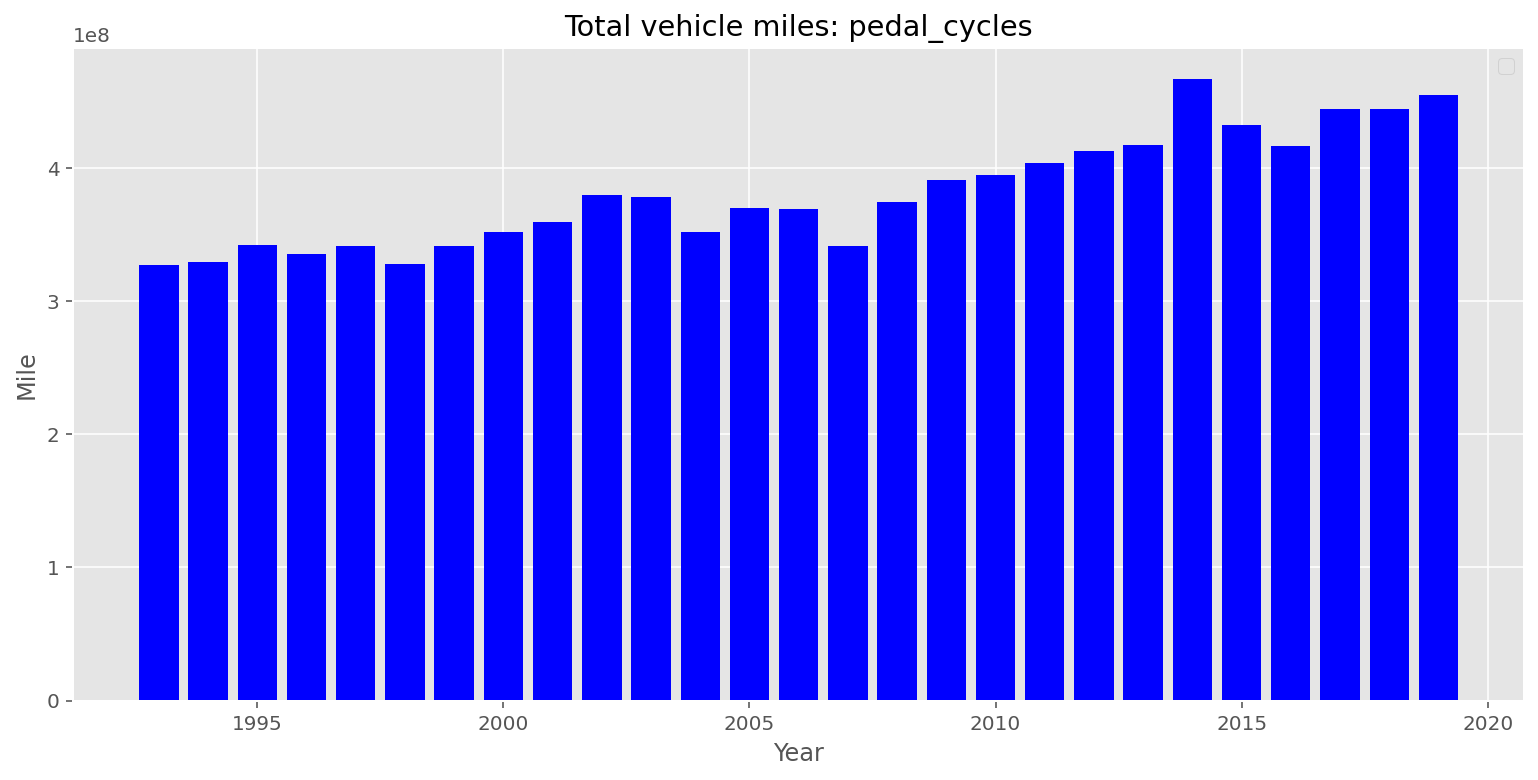

In [18]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
plt.bar( 'year', 'pedal_cycles', data=region_traffic, color='blue')
# show legend
plt.legend()
plt.title('Total vehicle miles: pedal_cycles')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


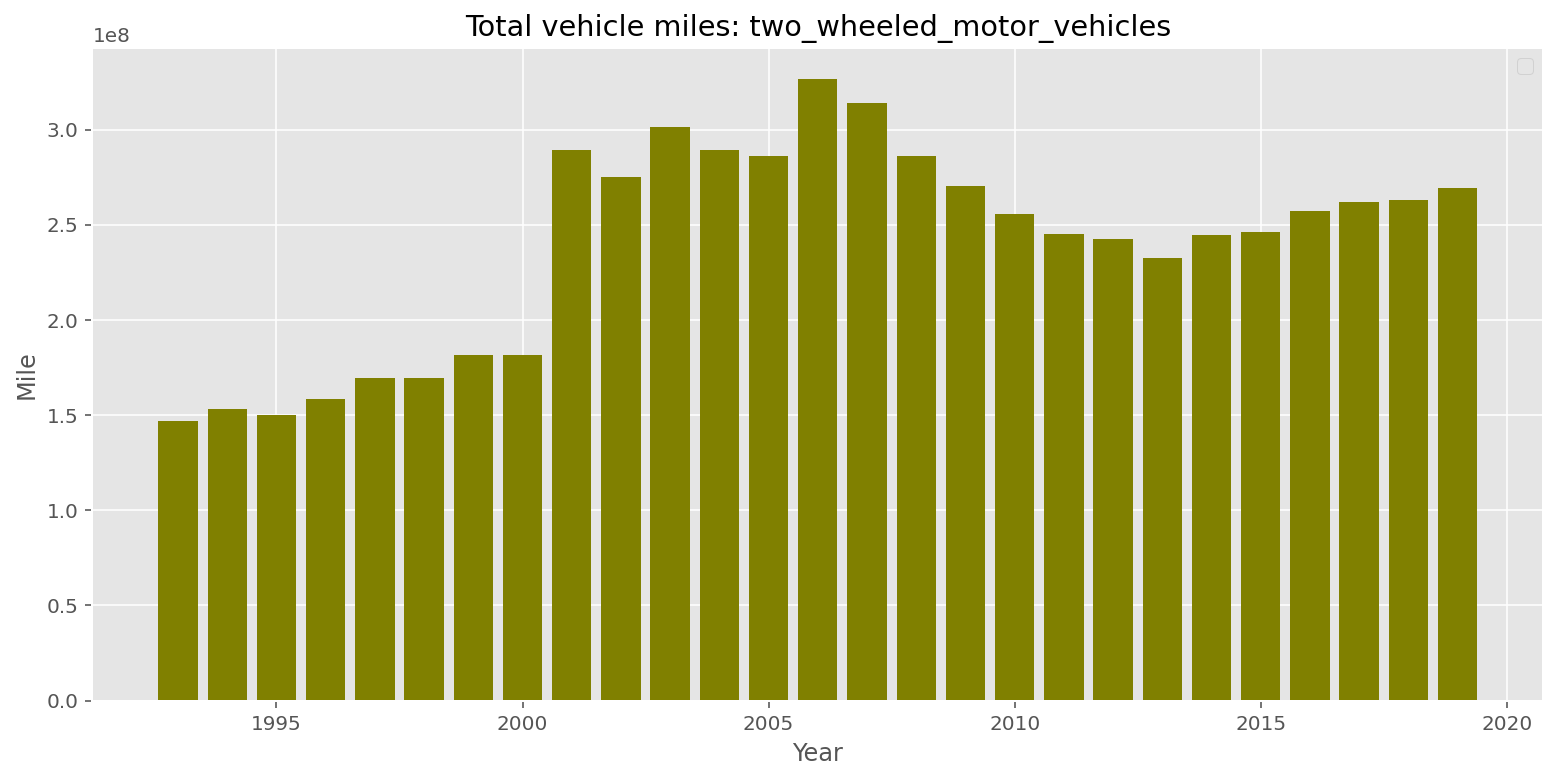

In [19]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
#plt.plot( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
#plt.plot( 'year', 'buses_and_coaches', data=region_traffic, color='green')
#plt.plot( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: two_wheeled_motor_vehicles')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


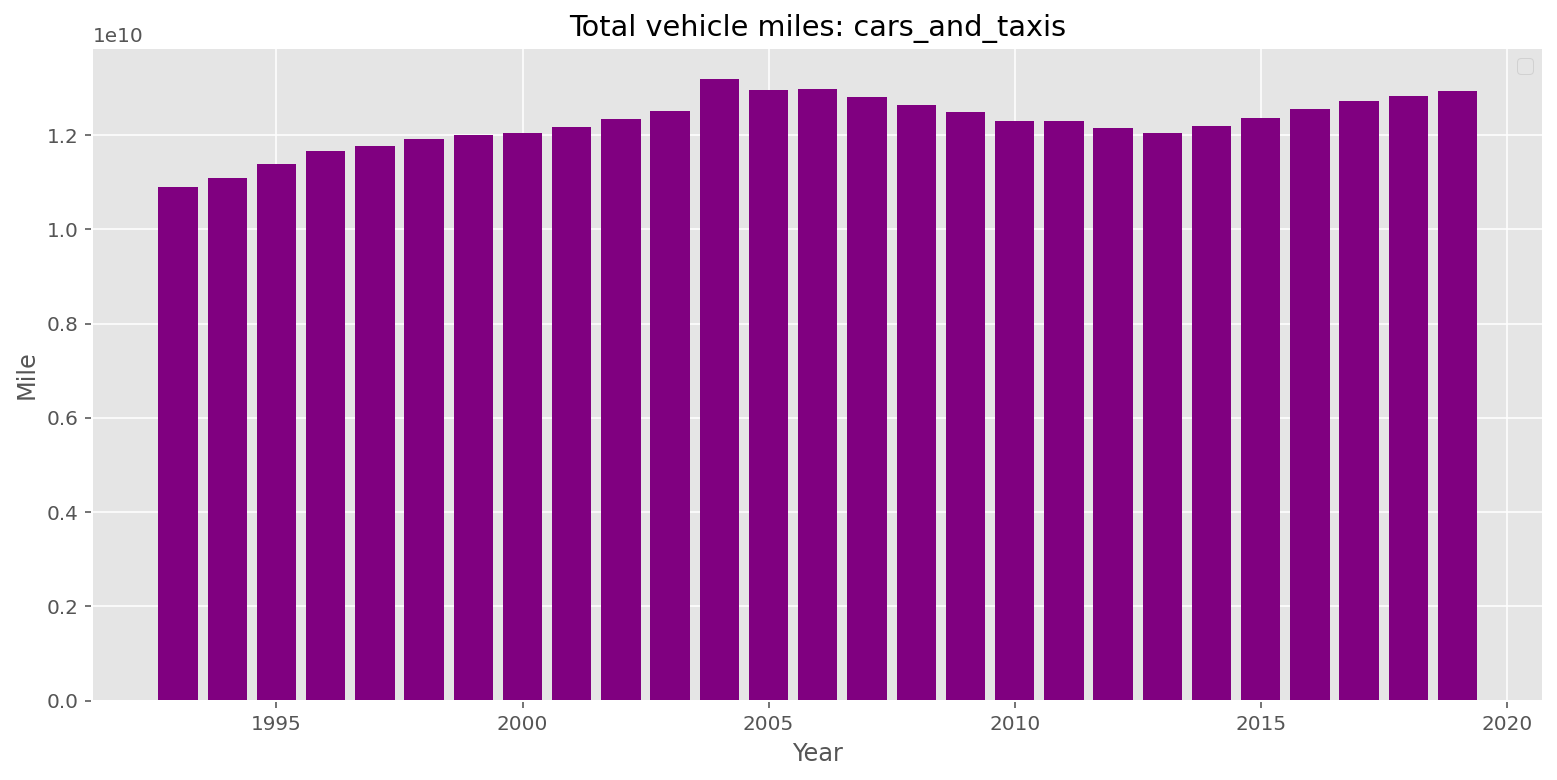

In [20]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
#plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
plt.bar( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
#plt.plot( 'year', 'buses_and_coaches', data=region_traffic, color='green')
#plt.plot( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: cars_and_taxis')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


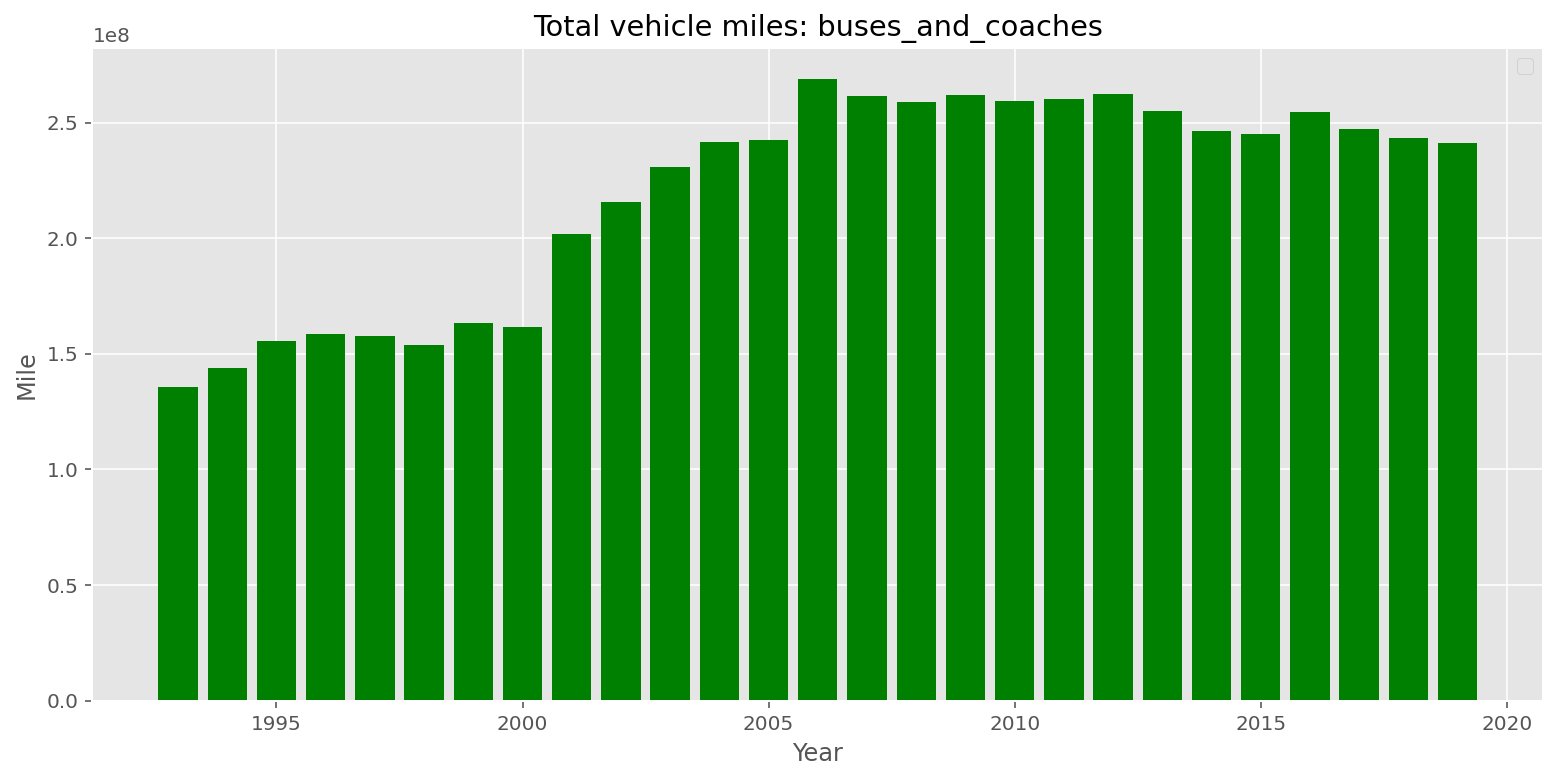

In [21]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
#plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
#plt.bar( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
plt.bar( 'year', 'buses_and_coaches', data=region_traffic, color='green')
#plt.plot( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: buses_and_coaches')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

No handles with labels found to put in legend.


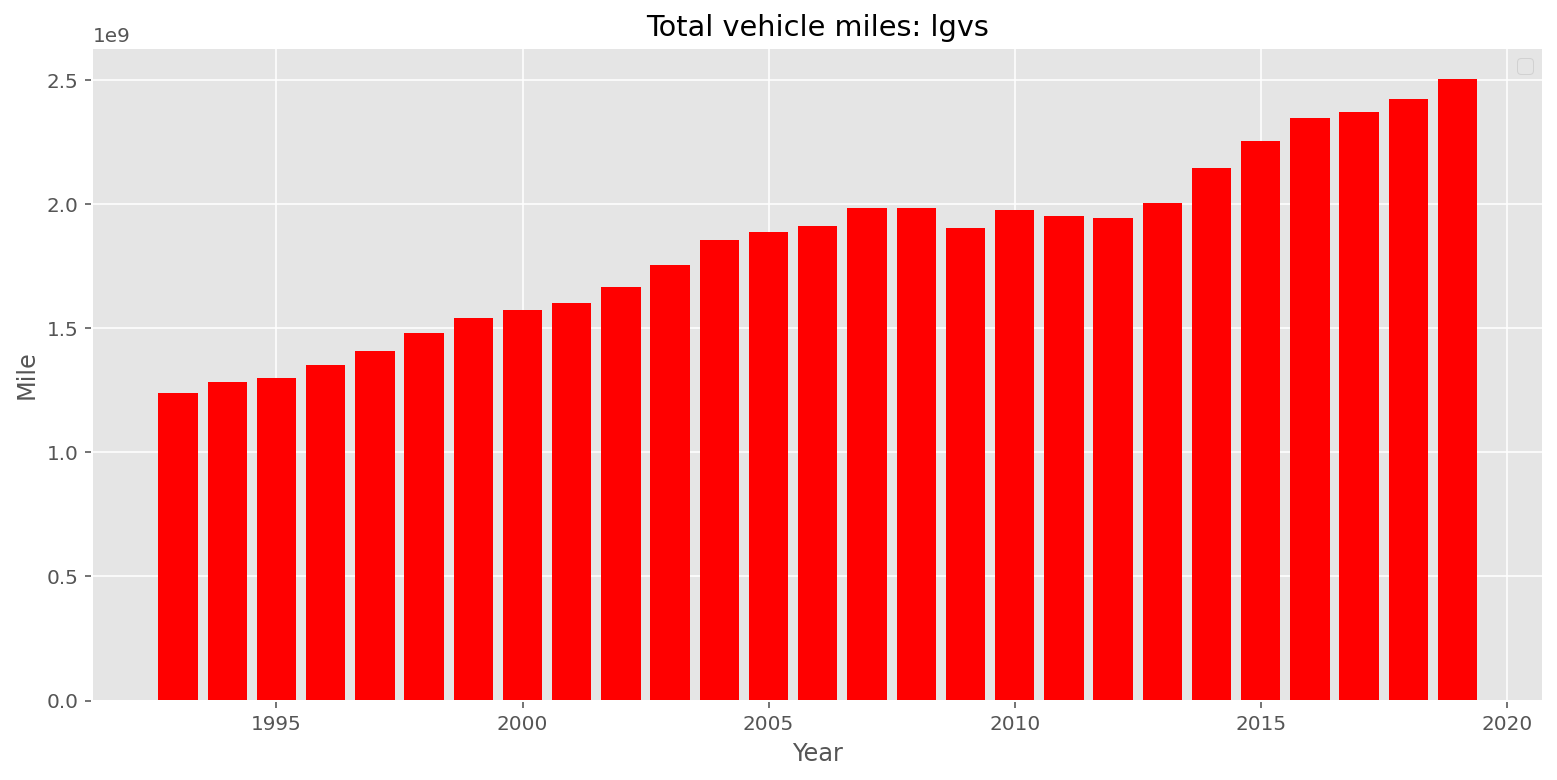

In [22]:
plt.figure(figsize=(13, 6))
barWidth = 0.9
#plt.bar( 'year', 'two_wheeled_motor_vehicles', data=region_traffic, color='olive')
#plt.bar( 'year', 'cars_and_taxis', data=region_traffic, color='purple')
#plt.bar( 'year', 'buses_and_coaches', data=region_traffic, color='green')
plt.bar( 'year', 'lgvs', data=region_traffic, color='red')
# show legend
plt.legend()
plt.title('Total vehicle miles: lgvs')
plt.xlabel('Year')
plt.ylabel('Mile')
# show graph
plt.show()

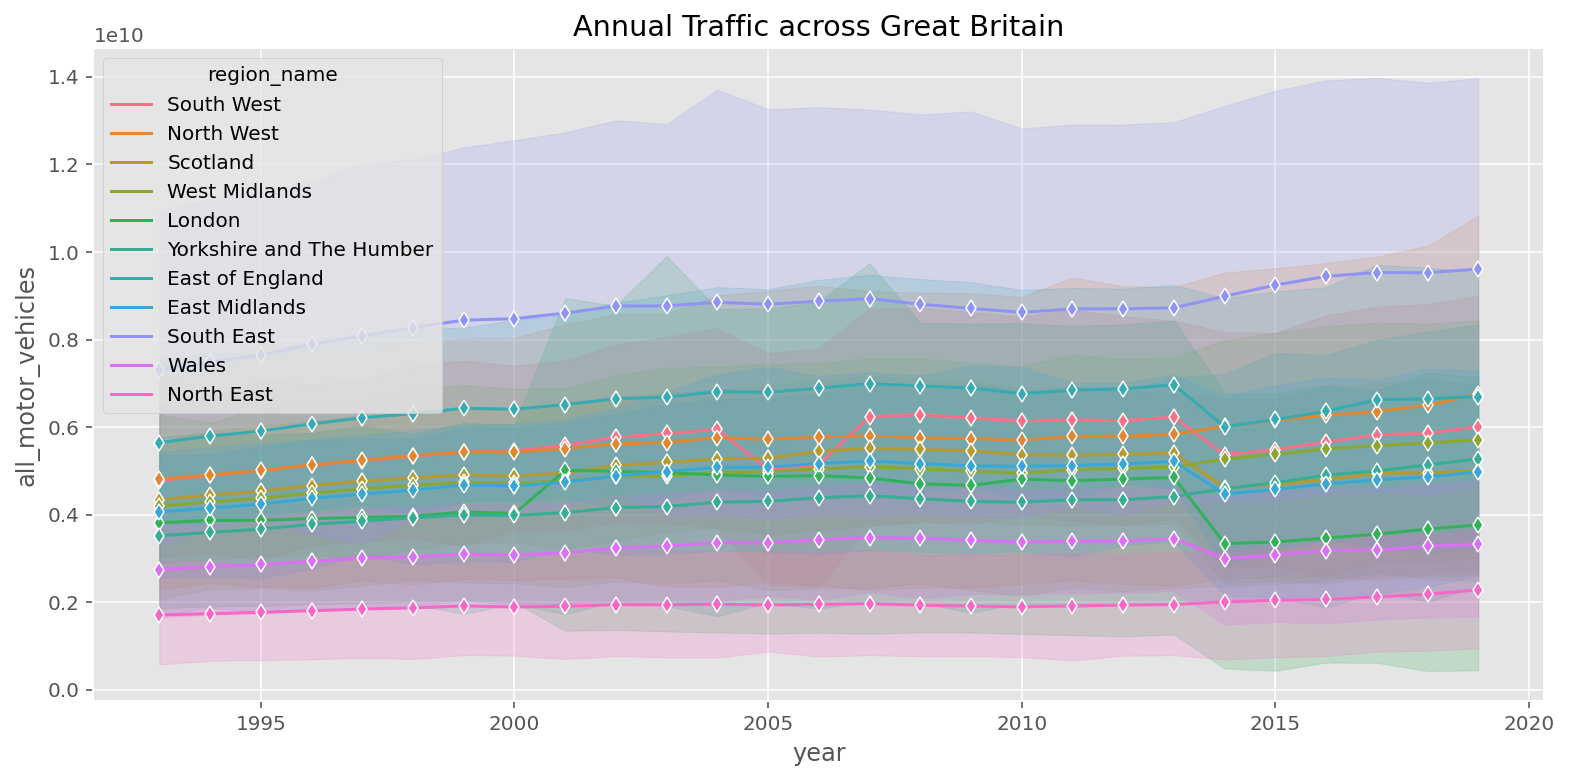

In [23]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='all_motor_vehicles', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain')
plt.show()

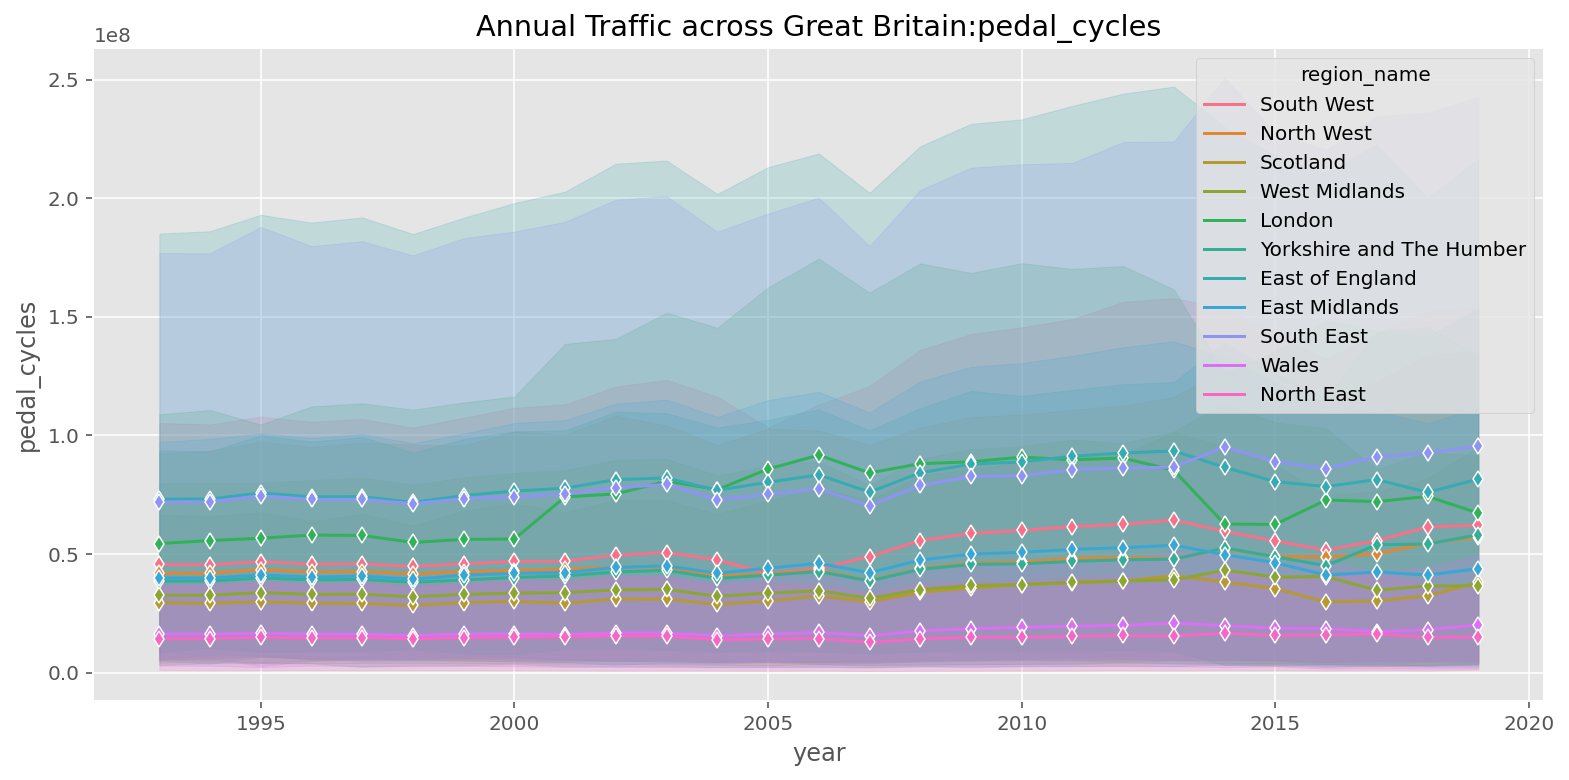

In [24]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='pedal_cycles', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain:pedal_cycles')
plt.show()

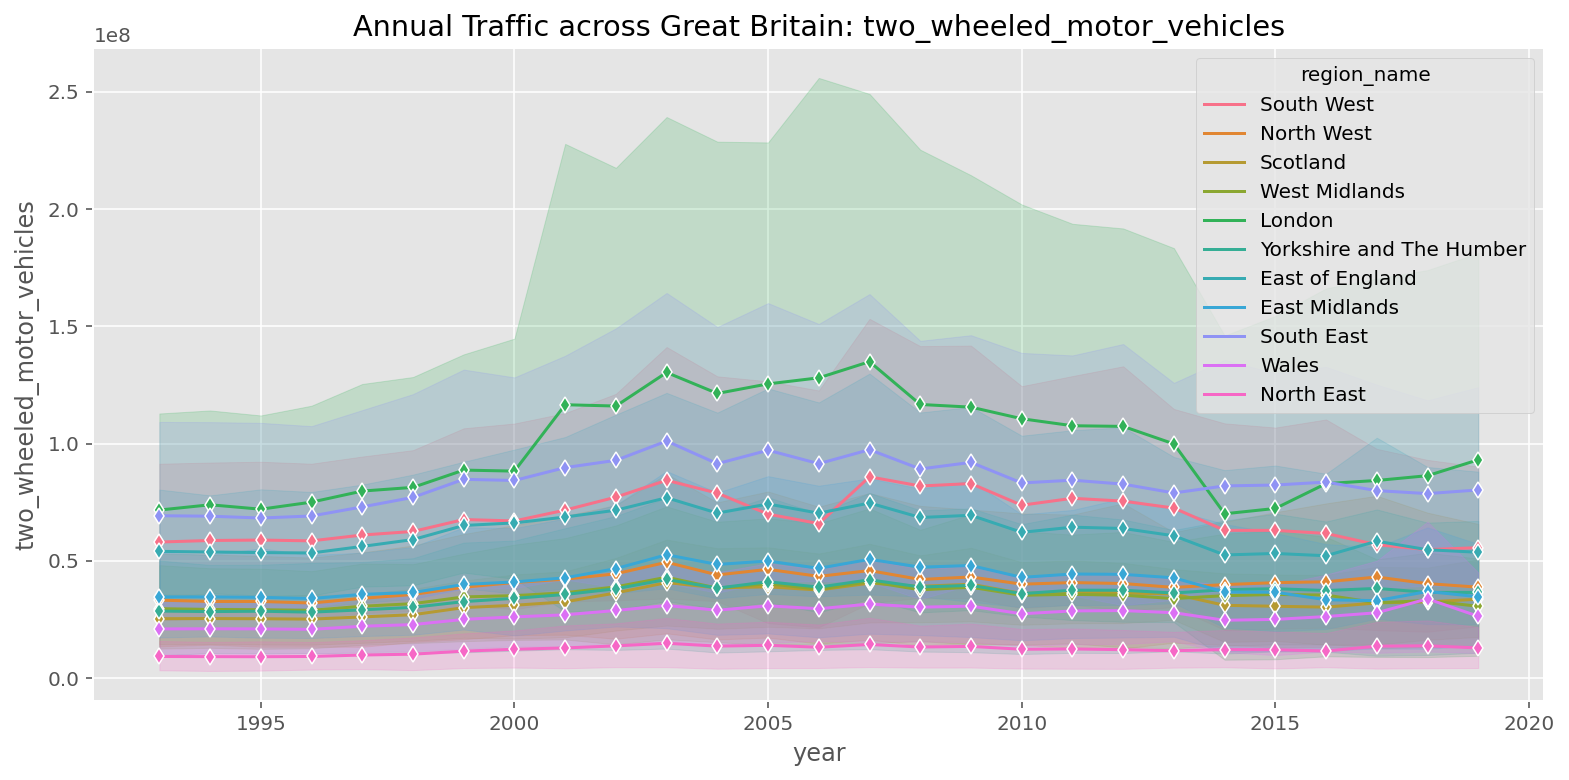

In [25]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='two_wheeled_motor_vehicles', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain: two_wheeled_motor_vehicles')
plt.show()

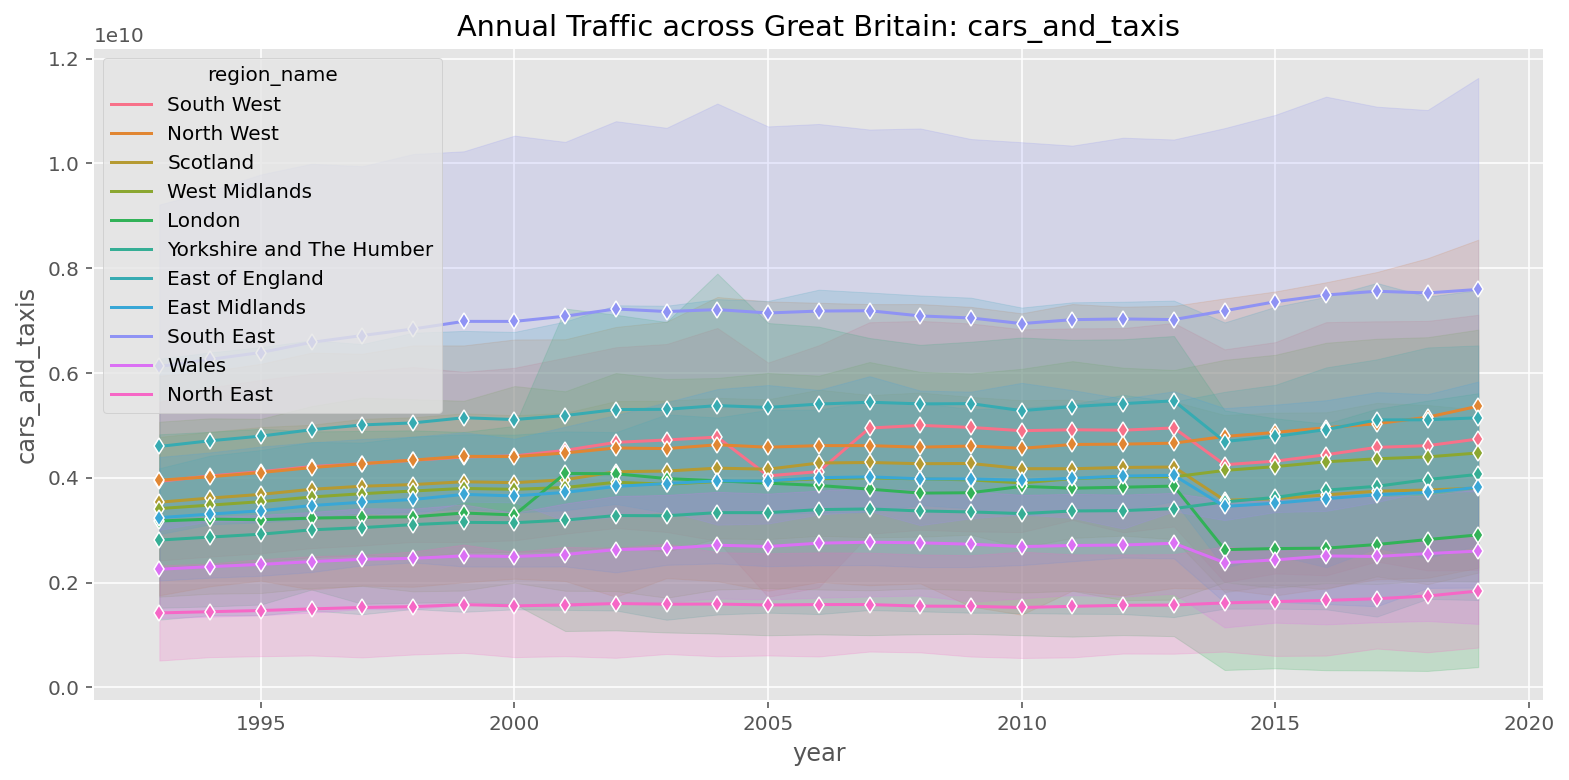

In [26]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='cars_and_taxis', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain: cars_and_taxis')
plt.show()

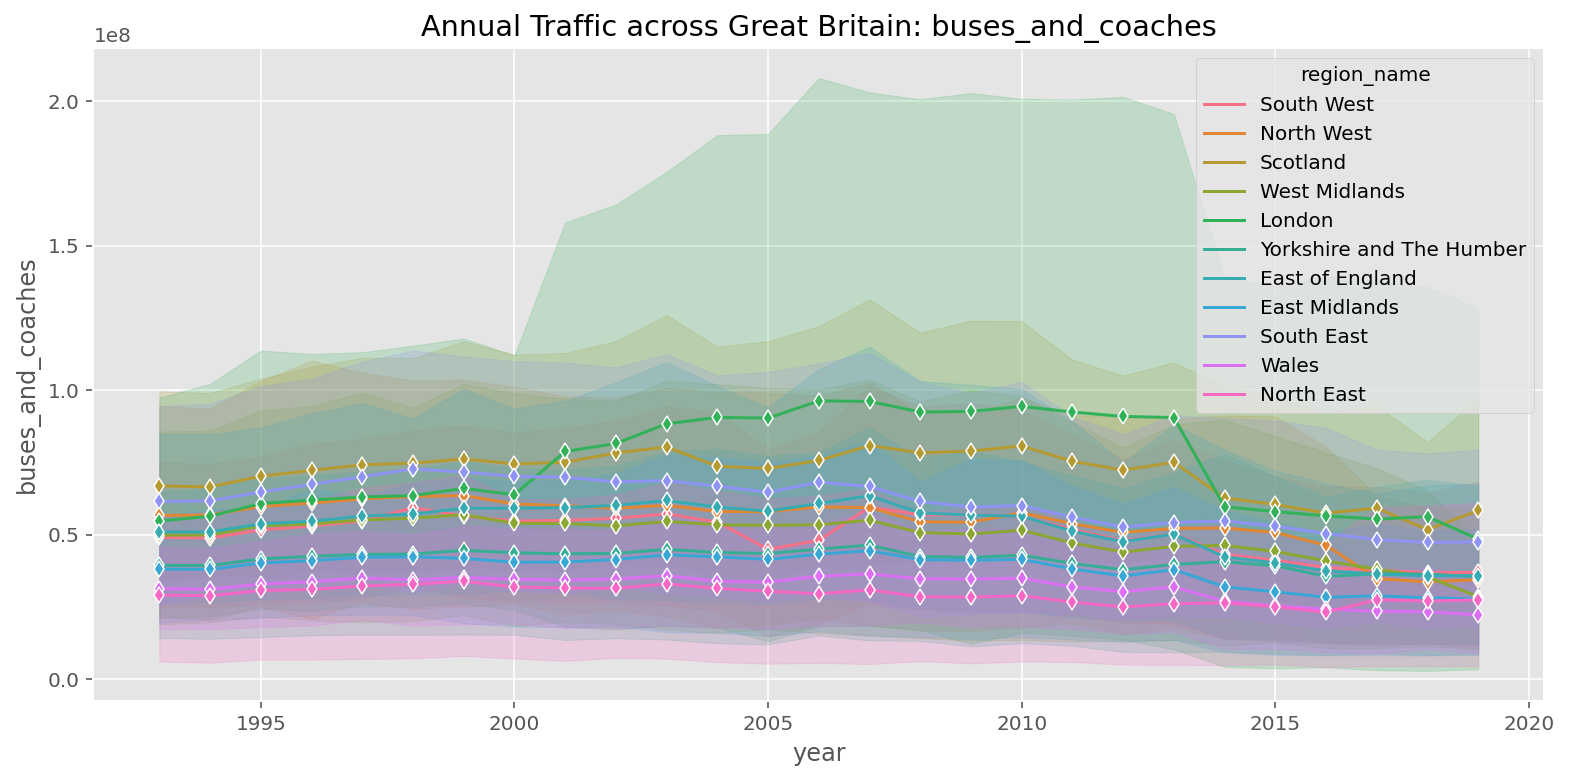

In [27]:
fig, ax1 = plt.subplots(figsize=(13,6))
sns.lineplot(x='year',y='buses_and_coaches', data=region_traffic, hue='region_name', marker='d', ax=ax1)
plt.title('Annual Traffic across Great Britain: buses_and_coaches')
plt.show()

In [28]:
#accidents = accidents.join(vehicles, how='outer')

In [29]:
sum=len(accidents)
print("Number of accidents:", sum)

Number of accidents: 1780653


## Identifying Missing Values


In [30]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

# Data Visualization

In [31]:
al=accidents['Longitude'].value_counts()
at=accidents['Latitude'].value_counts()
location=[al,at]
print(location)

[-0.977611    68
-1.871043    57
-3.310596    48
-0.104426    46
-0.173445    45
             ..
-2.526805     1
-1.129503     1
-0.053105     1
-0.127735     1
-3.780906     1
Name: Longitude, Length: 1233396, dtype: int64, 52.458798    74
52.949719    68
51.519764    49
51.506693    48
51.526956    45
             ..
54.852158     1
53.361984     1
51.663320     1
53.957042     1
51.938466     1
Name: Latitude, Length: 1157110, dtype: int64]


In [32]:
#years = accidents.loc[:,'Date'].groupby(accidents['Date'].map(lambda x: x[6:10])).count()
#years=pd.DataFrame(data=years)
#years['Year']=years.index
#years.columns=['Accidents', 'Year']

#years.plot(kind='bar',color="pink", alpha=0.7, title='Number of accidents in every year', figsize=(12,5), legend=False, rot=0)
#plt.ylabel('Number od accidents' , fontsize = 18)
#plt.xlabel('Years', fontsize = 18)

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

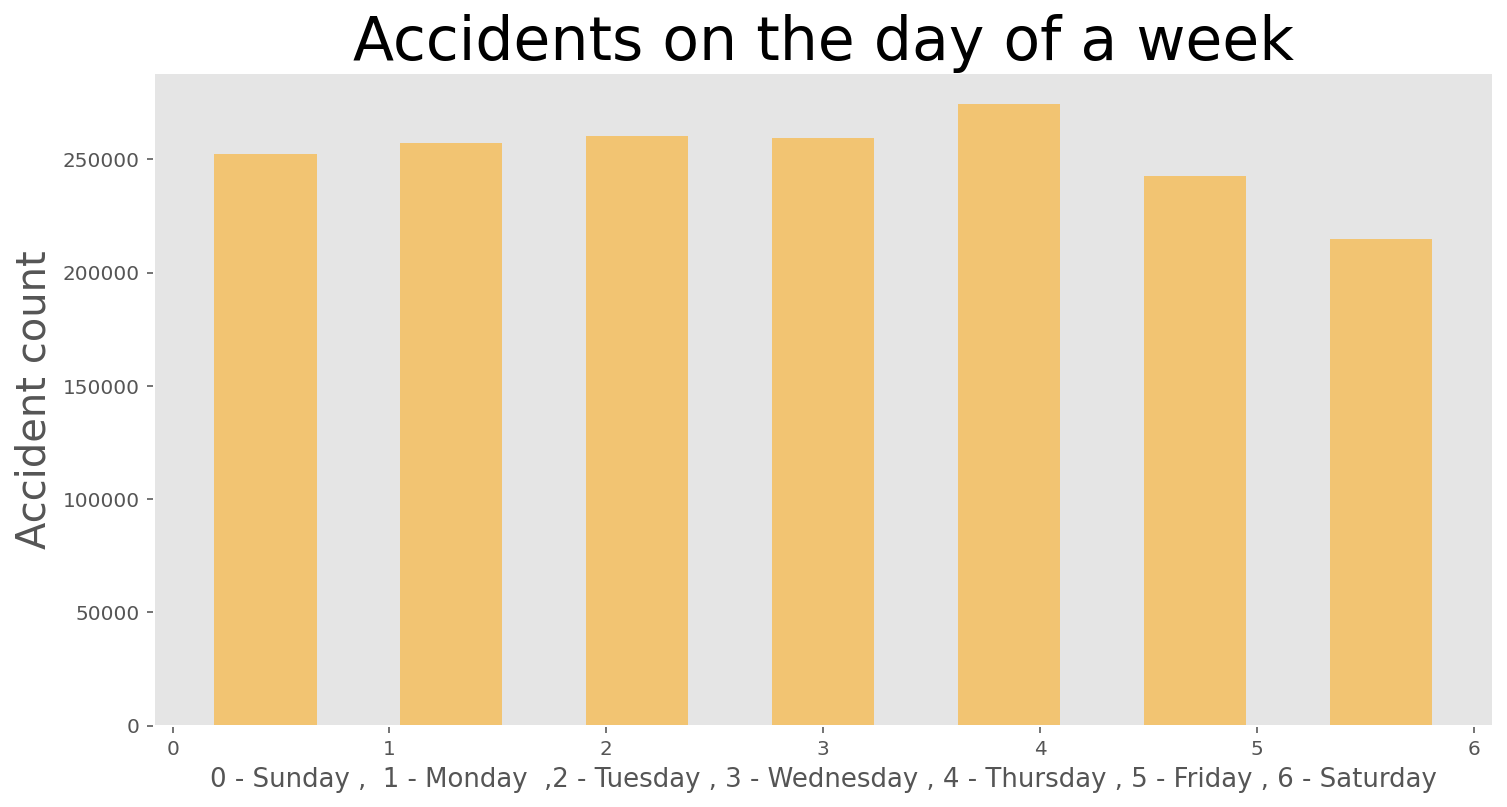

In [33]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

Text(0, 0.5, 'Accident count')

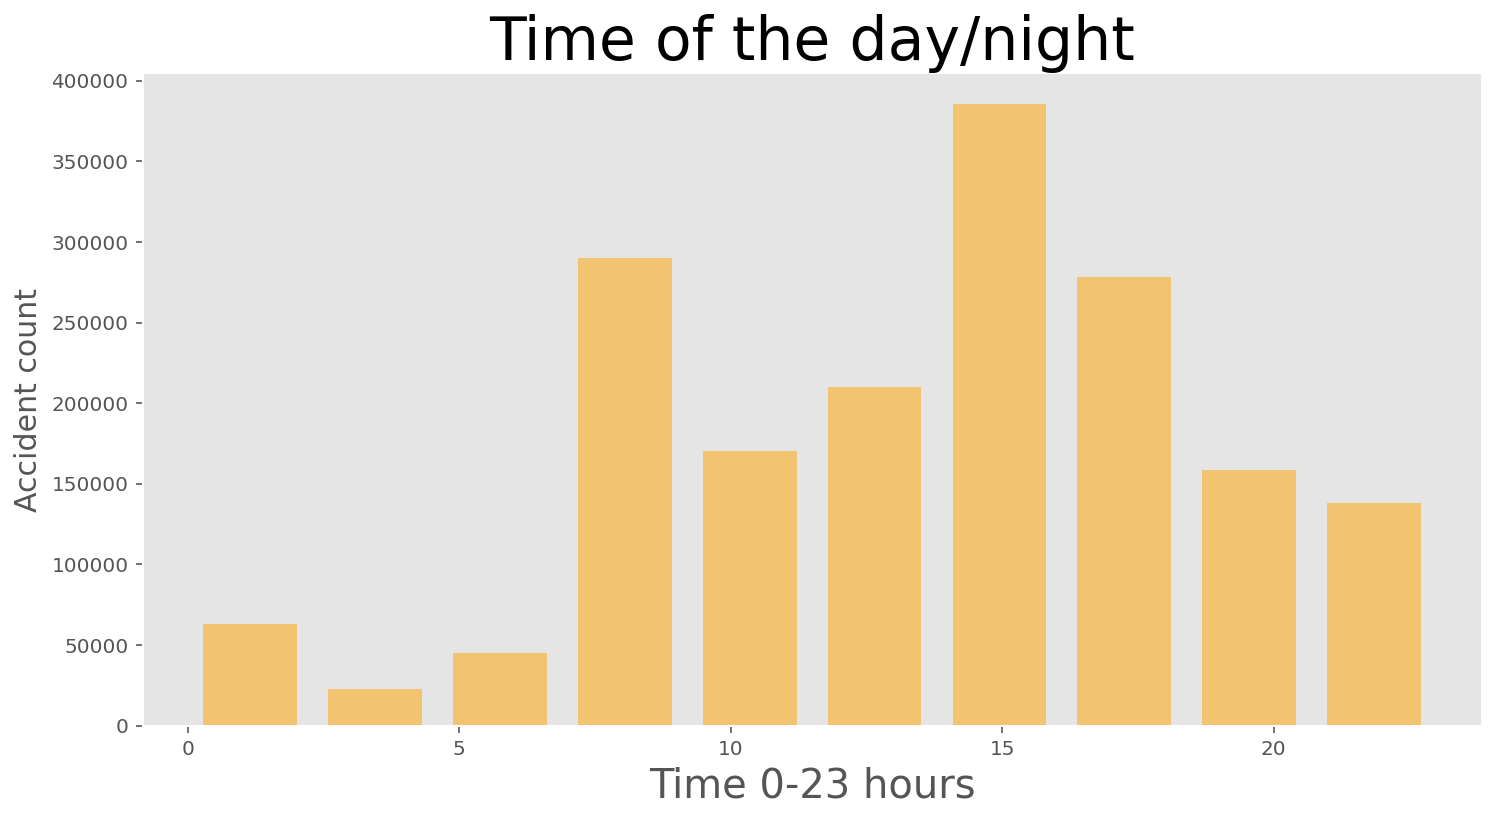

In [34]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f53afe77310>],
      dtype=object)

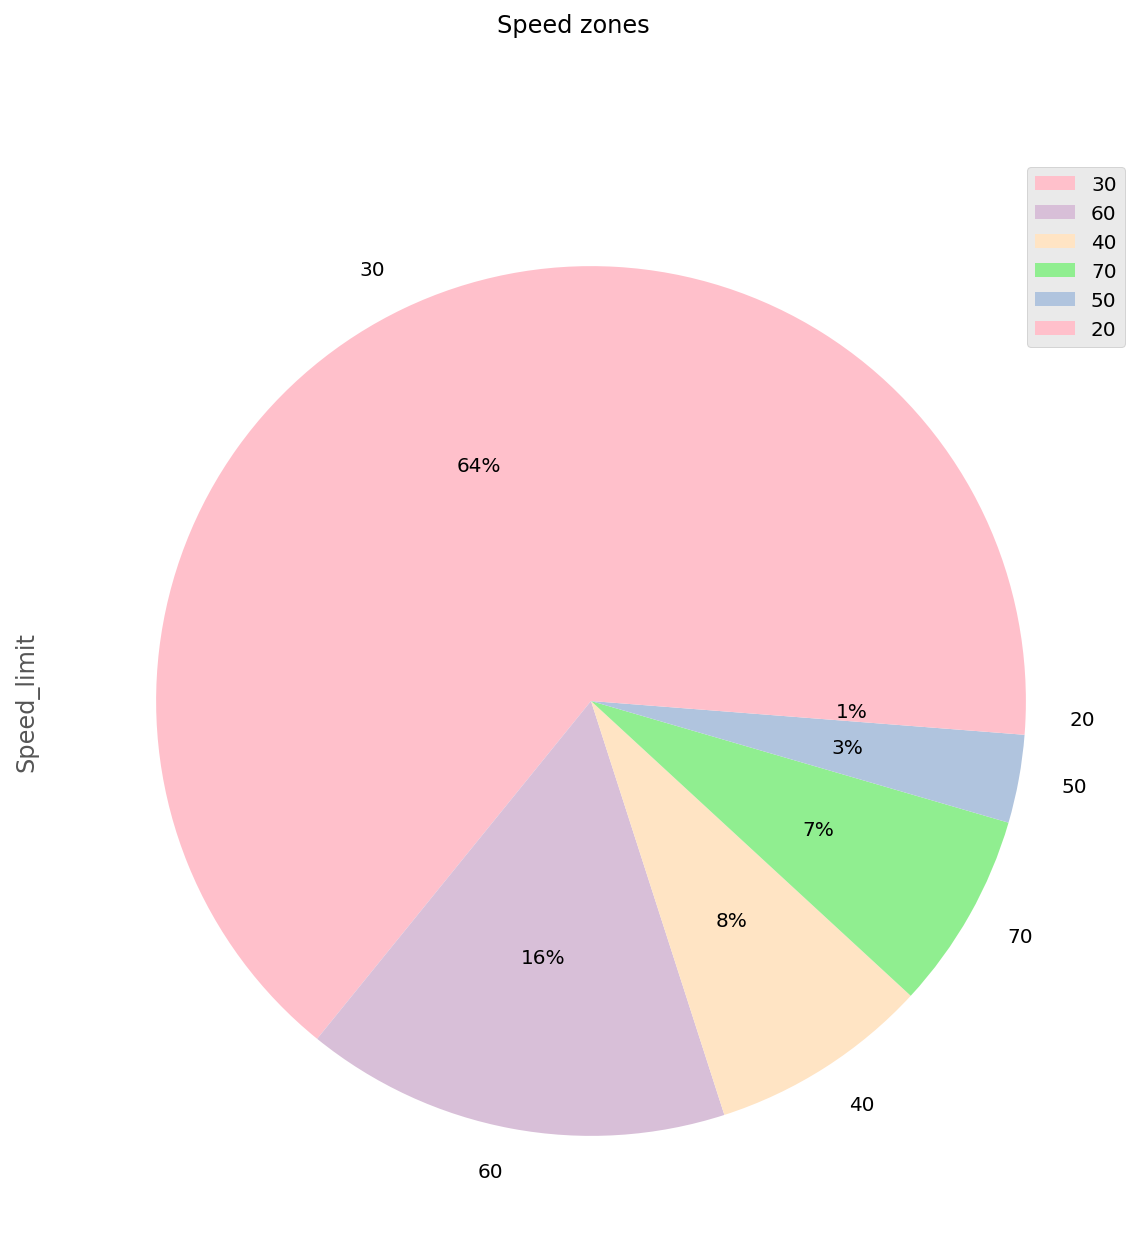

In [35]:
speed1 = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])] 
speed = speed1.Speed_limit.value_counts()
speed.plot(kind='pie', subplots=True, figsize=(10,10), colors=['pink', 'thistle','bisque', 'lightgreen','lightsteelblue'],  autopct='%1.0f%%', title="Speed zones",legend=True)

Text(0.5, 0, 'Accidents')

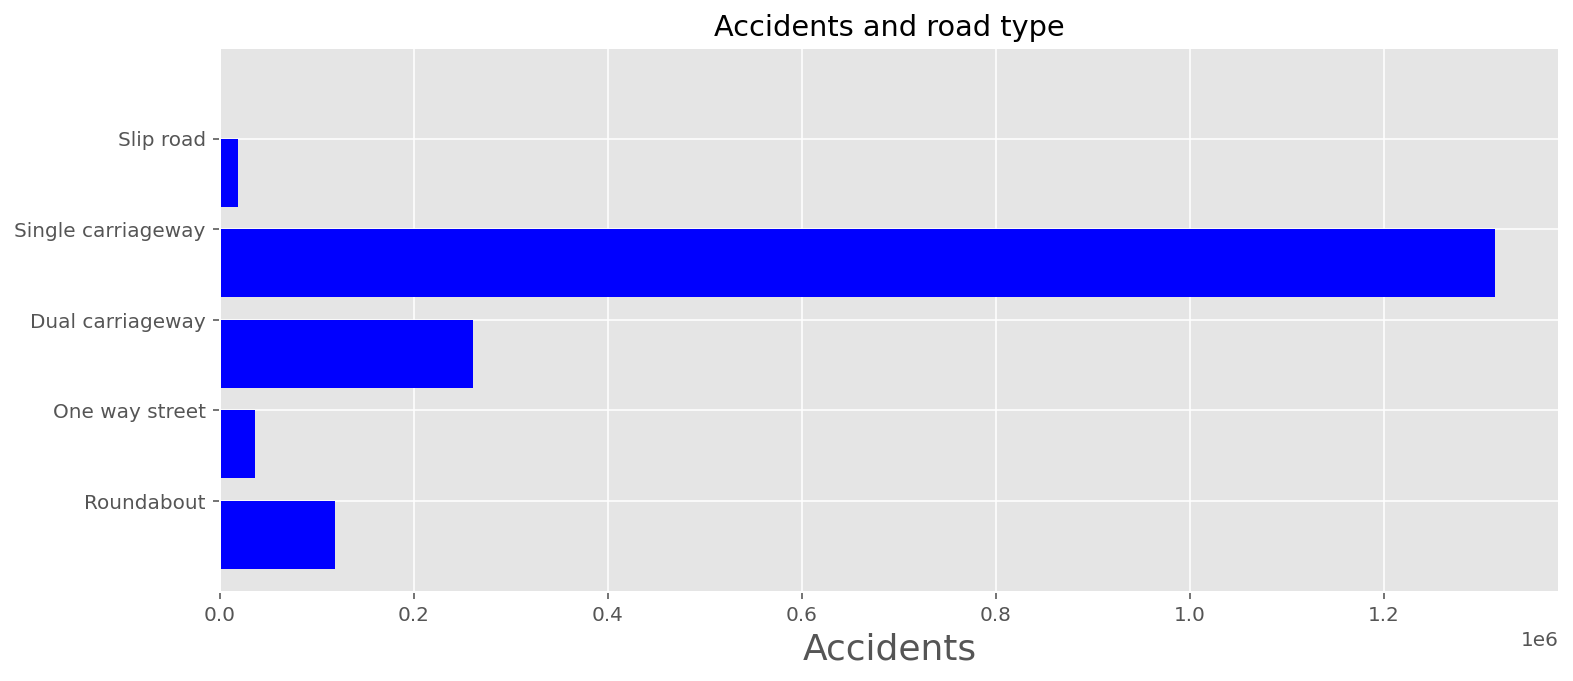

In [36]:
road=accidents[accidents.Road_Type!=9] # deleting rows:'not known'
road1 = road.loc[:,'Road_Type'].groupby(road['Road_Type']).count()

road=pd.DataFrame(data=road1)
road['road']=road.index
road.columns=['Accidents', 'road']
road.index=['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road']
road.plot(kind='barh',  title='Accidents and road type', figsize=(12,5), legend=False, color='blue', alpha=1, width=1.5)
plt.xlabel('Accidents' , fontsize = 18)

   driver   number
0  Female   852519
1    Male  1978150


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f53af348dd0>],
      dtype=object)

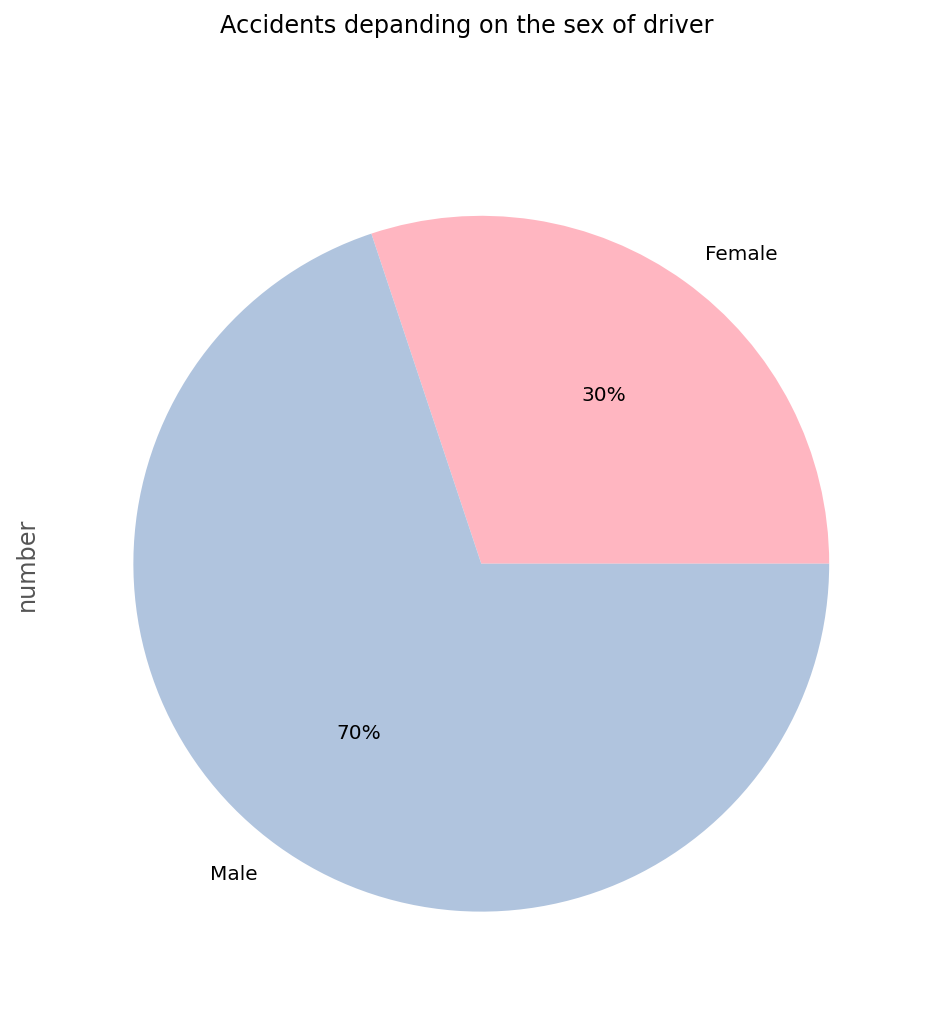

In [37]:
sex_d=vehicles['Sex_of_Driver']
kobiety=0
for x in sex_d:
    if x==2:
        kobiety=kobiety+1
mez=0
for x in sex_d:
    if x==1:
        mez=mez+1

sex_table = pd.DataFrame({'driver': ['Female','Male'],'number':[kobiety,mez]})
print(sex_table)

sex_table.set_index('driver', inplace=True)
sex_table['number'].plot(kind='pie', subplots=True, figsize=(8, 8), colors=['lightpink', 'lightsteelblue'], autopct='%1.0f%%', title="Accidents depanding on the sex of driver")

In [9]:
casualties=pd.read_csv('Casualties0515.csv')

   driver  number
0  Female  437317
1    Male  610742


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78efb485d0>],
      dtype=object)

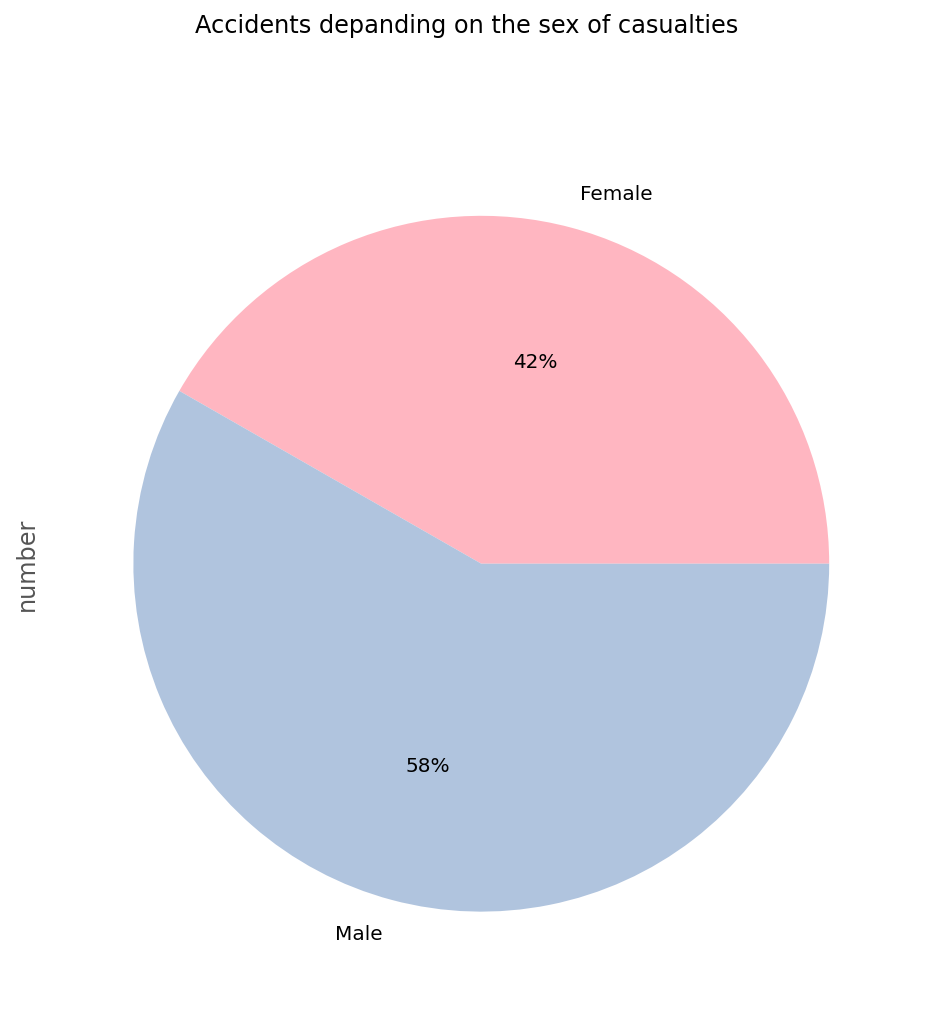

In [10]:
sex_c=casualties['Sex_of_Casualty']
kobiety=0
for x in sex_c:
    if x==2:
        kobiety=kobiety+1
mez=0
for x in sex_c:
    if x==1:
        mez=mez+1

sex_table = pd.DataFrame([{'driver': 'Female','number':kobiety},
                {'driver': 'Male','number':mez}])
print(sex_table)

sex_table.set_index('driver', inplace=True)
sex_table['number'].plot(kind='pie', subplots=True, figsize=(8, 8), colors=['lightpink', 'lightsteelblue'], autopct='%1.0f%%', title="Accidents depanding on the sex of casualties")

In [1]:
#casualties=pd.read_csv('Casualties0515.csv')
plec=casualties.loc[:,['Accident_Index','Sex_of_Casualty']]
poszkodowani=casualties.loc[:,['Accident_Index','Casualty_Class']]
tabelka1=pd.merge(poszkodowani, plec, on='Accident_Index')

def wybrane_nr(dane, number1,number2, what1, what2):
    table=dane[dane[what1]==number1]
    table=table[table[what2]==number2]    
    return (table.count())[what1]

m1=wybrane_nr(tabelka1,1,1,'Casualty_Class','Sex_of_Casualty')
m2=wybrane_nr(tabelka1,2,1,'Casualty_Class','Sex_of_Casualty')
m3=wybrane_nr(tabelka1,3,1,'Casualty_Class','Sex_of_Casualty')
k1=wybrane_nr(tabelka1,1,2,'Casualty_Class','Sex_of_Casualty')
k2=wybrane_nr(tabelka1,2,2,'Casualty_Class','Sex_of_Casualty')
k3=wybrane_nr(tabelka1,3,2,'Casualty_Class','Sex_of_Casualty')

group_names=['Driver', 'Passanger', 'Pedestrian']
group_size=[m1+k1,m2+k2,m3+k3]
subgroup_names=['M', 'F','M', 'F','M', 'F']
subgroup_size=[m1,k1,m2,k2,m3,k3]
 

a, b, c=[plt.cm.OrRd, plt.cm.PuRd, plt.cm.PuBu]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, colors=[a(0.6), b(0.5), c(0.6)])
plt.setp( mypie,width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names, labeldistance=0.7,colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp( mypie2, width=0.5, edgecolor='white') 
plt.show()

NameError: ignored

In [ ]:
band = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']
vehicles.Age_Band_of_Driver.hist(bins=11, color='blue', alpha=0.4, rwidth=0.9, figsize=(10,5))
plt.grid(False)
y = np.arange(len(band))
plt.xticks(y , band)

plt.ylabel('Accidents' , fontsize = 18)
plt.xlabel('Age of drivers', fontsize = 18)

In [ ]:
accident_sev=pd.read_csv('Accidents0515.csv')

waga = accidents.loc[:,'Accident_Severity'].groupby(accidents['Accident_Severity']).count()

waga=pd.DataFrame(data=waga)
waga['Accident']=waga.index

waga.columns=['Accidents', 'Accident_Severity']
waga['Accident_Severity']=['Fatal','Serious','Slight']
waga.index=['Fatal','Serious','Slight']

w=waga.plot(kind='bar',color='gold',alpha=0.4,  title='Severity of accidents', figsize=(8,5), legend=False, width=0.5, rot=0)
plt.ylabel('Accidents' , fontsize = 18)
plt.xlabel('')


for i in w.patches:
    
    w.text(i.get_x()+.13, i.get_height()+12000, \
            str(round(i.get_height())), fontsize=11, color='grey', rotation=0)

In [ ]:
plec=vehicles.loc[:,['Accident_Index','Sex_of_Driver']]
powaga=accidents.loc[:,['Accident_Index','Accident_Severity']]
tabelka1=pd.merge(powaga, plec, on='Accident_Index')

m1=wybrane_nr(tabelka1,1,1,'Accident_Severity','Sex_of_Driver')
m2=wybrane_nr(tabelka1,2,1,'Accident_Severity','Sex_of_Driver')
m3=wybrane_nr(tabelka1,3,1,'Accident_Severity','Sex_of_Driver')
k1=wybrane_nr(tabelka1,1,2,'Accident_Severity','Sex_of_Driver')
k2=wybrane_nr(tabelka1,2,2,'Accident_Severity','Sex_of_Driver')
k3=wybrane_nr(tabelka1,3,2,'Accident_Severity','Sex_of_Driver')

group_names=['Fatal', 'Serious', 'Slight']
group_size=[m1+k1,m2+k2,m3+k3]
subgroup_names=['M', 'F','M', 'F','M', 'F']
subgroup_size=[m1,k1,m2,k2,m3,k3]
 

a, b, c=[plt.cm.Reds, plt.cm.spring, plt.cm.PuBu]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.3), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0) 
plt.show()


In [ ]:
labels = 'Female', 'Male'
fracs1 = [k1,m1]
fracs2 = [k2,m2]
fracs3 = [k3,m3]


fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(fracs1, labels=labels, radius = 1.2, colors=['pink','lightblue'],autopct='%1.0f%%')
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(fracs2, labels=labels, radius = 1.2,colors=['pink','lightblue'],autopct='%1.0f%%')
ax3 = fig.add_axes([.0, .0, 2.5, 0.5], aspect=1)
ax3.pie(fracs3, labels=labels, radius = 1.2,colors=['pink','lightblue'],autopct='%1.0f%%')
ax1.set_title('Fatal')
ax2.set_title('Serious')
ax3.set_title('Slight')

plt.show()


#### Age band of casualities

In [ ]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

In [ ]:
speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

## Co-relation between variables


In [ ]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [ ]:
accidents_2014 = accidents[accidents.Date_time.dt.year ==2014]
accidents_2014_01 = accidents_2014[accidents_2014.Accident_Severity == 1]
accidents_2014_02 = accidents_2014[accidents_2014.Accident_Severity == 2]
accidents_2014_03 = accidents_2014[accidents_2014.Accident_Severity == 3]

## Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

## Normalize the Data


In [ ]:
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

In [ ]:
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

## Spliting the data into training data and test data


In [ ]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

## Logistic Regression 

In [ ]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

## Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Hyperparameters tuning for the models


### Logistic Regression with Hyperparameter tuning


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

### Decision Tree hyperparameters tuning


In [ ]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

We really didn't see much difference in Accident severity 1 and 2. However we did improve the accuracy of Accident severity 3. It jumped the accuracy from 75.1% to 85.8%.

###  Random Forest Hyperparameter tuning


In [ ]:
random_forest.get_params()

We will implement the grid search using sklearn library. 

In [3]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [4, 5],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
random_f = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = random_f, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)


NameError: ignored

In [ ]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
Y_pred = grid_search.predict(X_test)
acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [ ]:
import joblib
joblib.dump(random_forest, 'model.pkl')